In [8]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report



df = pd.read_csv(r"heart_cleaned.csv")
df.drop(columns = ['id','dataset'],inplace = True)

In [9]:
df.drop(columns = ['thal','ca'],inplace = True)

In [10]:
X = df.drop(columns='num', axis = 1)  # or whatever your label is
y = df['num']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping
860,75,Male,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping
435,53,Female,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat


In [11]:
# si = SimpleImputer(strategy = 'most_frequent')
# X_train[['restecg' ,'exang','fbs','slope']] = si.fit_transform(X_train[['restecg' ,'exang','fbs','slope']])
# X_test[['restecg' ,'exang','fbs','slope']] = si.transform(X_test[['restecg' ,'exang','fbs','slope']])

In [12]:
# scale_columns = ['age','trestbps', 'chol' ,'thalch', 'oldpeak']
# ss = StandardScaler()
# X_train[scale_columns]  = ss.fit_transform(X_train[scale_columns])
# X_test[scale_columns]  = ss.transform(X_test[scale_columns])


In [13]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping
860,75,Male,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping
435,53,Female,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat


In [14]:



cp_order = [['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']]
slope_order = [['upsloping', 'flat', 'downsloping']]
restecg_order = [['normal', 'st-t abnormality', 'lv hypertrophy']]
scale_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


#Pipeline for categorical columns
sex_pipeline = Pipeline([
    ("encode", OrdinalEncoder(categories=[["Female","Male"]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

exang_pipeline = Pipeline([
     ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=[[False,True]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

fbs_pipeline= Pipeline([
     ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=[[False,True]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

restecg_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=restecg_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

cp_pipeline = Pipeline([
    ("encode", OrdinalEncoder(categories=cp_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

slope_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=slope_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

num_scale_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Final ColumnTransformer
cat_preprocessor = ColumnTransformer(transformers=[
    ("restecg", restecg_pipeline, ['restecg']),
    ("cp", cp_pipeline, ['cp']),
    ("slope", slope_pipeline, ['slope']),
    ("sex",sex_pipeline,['sex']),
    ("fbs",fbs_pipeline,["fbs"]),
    ("exang",exang_pipeline,["exang"])
], remainder='passthrough', verbose_feature_names_out=False)

# Columns
knn_cols = ['trestbps', 'thalch', 'oldpeak']
chol_cols =  ['chol','sex','fbs','thalch','age','cp','restecg'] #['chol','age' , 'sex' , 'fbs', 'thalch', 'age','cp','restecg']

# Pipelines
knn_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5))
])

chol_pipeline = Pipeline([
    ("imputer", IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=10, random_state=0),
        max_iter=10,
        random_state=0))
])

chol_transformer = ColumnTransformer(transformers = [
    ('chol',chol_pipeline,chol_cols)
],remainder = "passthrough" , verbose_feature_names_out = False)


knn_transformer = ColumnTransformer(transformers=[
    ('knn', knn_pipeline, knn_cols)
], remainder='passthrough', verbose_feature_names_out=False)



cat_preprocessor.set_output(transform='pandas')
knn_transformer.set_output(transform='pandas')
chol_transformer.set_output(transform='pandas')

### STEP 4: FINAL FULL PIPELINE
full_pipeline = Pipeline([
    ("categorical", cat_preprocessor),
    ("knn", knn_transformer),
    ("chol",chol_transformer) ])


X_train_transformed =  full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)
X_train_transformed

,chol,sex,fbs,thalch,age,cp,restecg,trestbps,oldpeak,slope,exang
880,170.0000,1.0,0.0,120.000000,62.0,3.0,1.0,132.000000,3.000000,1.0,1.0
457,224.4875,1.0,0.0,122.000000,54.0,2.0,0.0,150.000000,0.000000,1.0,0.0
797,339.0000,1.0,0.0,137.456023,51.0,2.0,0.0,131.876812,0.881783,1.0,0.0
25,219.0000,0.0,0.0,158.000000,50.0,2.0,0.0,120.000000,1.600000,1.0,0.0
84,325.0000,1.0,0.0,172.000000,52.0,1.0,0.0,120.000000,0.200000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,177.0000,1.0,0.0,162.000000,59.0,3.0,0.0,140.000000,0.000000,0.0,1.0
270,207.0000,1.0,0.0,138.000000,61.0,3.0,2.0,140.000000,1.900000,0.0,1.0
860,310.0000,1.0,1.0,112.000000,75.0,3.0,0.0,160.000000,2.000000,2.0,1.0
435,216.0000,0.0,0.0,142.000000,53.0,1.0,0.0,140.000000,2.000000,1.0,1.0


In [15]:
order = X_train.columns
X_train_encoded = X_train_transformed[order]
X_test_encoded = X_test_transformed[order]

In [16]:
# knn_imputer = KNNImputer(n_neighbors=5)
# knn_imputer.set_output(transform = 'pandas')
# knn_features = [ 'trestbps', 'thalch', 'oldpeak'] #'age', 'restecg', 'trestbps', 'thalch', 'oldpeak', 'exang'
# impute_targets = ['trestbps', 'thalch', 'oldpeak']

# # 3a. Fit on train, transform both train and test
# X_train_knn = X_train_encoded[knn_features].copy()
# X_test_knn = X_test_encoded[knn_features].copy()

# X_train_knn_imputed = knn_imputer.fit_transform(X_train_knn)
                                

# X_test_knn_imputed = knn_imputer.transform(X_test_knn)

# # Replace imputed targets in original train/test sets
# X_train_encoded[impute_targets] = X_train_knn_imputed[impute_targets]
# X_test_encoded[impute_targets] = X_test_knn_imputed[impute_targets]



In [17]:
# # Select columns for imputation
# features_for_chol = ['chol','age' , 'sex' , 'fbs', 'thalch', 'age','cp','restecg']

# X_train_chol = X_train_encoded[features_for_chol].copy()
# X_test_chol = X_test_encoded[features_for_chol].copy()

# chol_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
#                                 max_iter=10,
#                                 random_state=0)

# # Fit on training data
# X_train_chol_imputed = chol_imputer.fit_transform(X_train_chol)

# # Transform test data using the same fitted imputer
# X_test_chol_imputed = chol_imputer.transform(X_test_chol)

# # Replace only 'chol' in X_train_transformed and X_test_transformed
# X_train_encoded.loc[:, 'chol'] = X_train_chol_imputed[:, 0]
# X_test_encoded.loc[:, 'chol'] = X_test_chol_imputed[:, 0]



<Axes: xlabel='trestbps', ylabel='Density'>

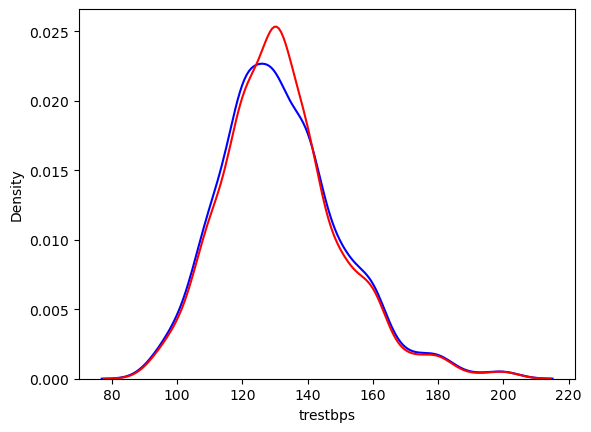

In [18]:
sns.kdeplot(X_train['trestbps'],color = "blue")
sns.kdeplot(X_train_encoded['trestbps'],color = "red")

<Axes: xlabel='chol', ylabel='Density'>

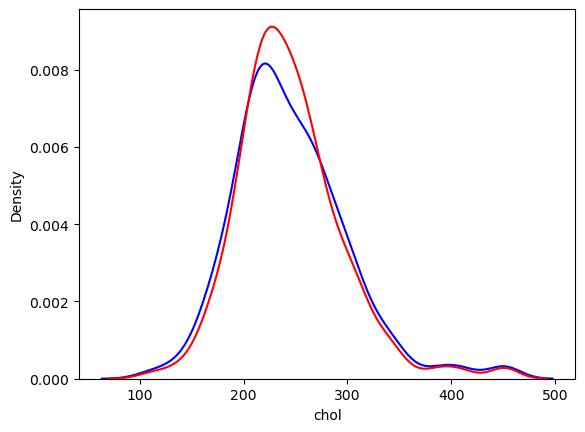

In [19]:
sns.kdeplot(X_train['chol'],color = "blue")
sns.kdeplot(X_train_encoded['chol'],color = "red")

<Axes: xlabel='thalch', ylabel='Density'>

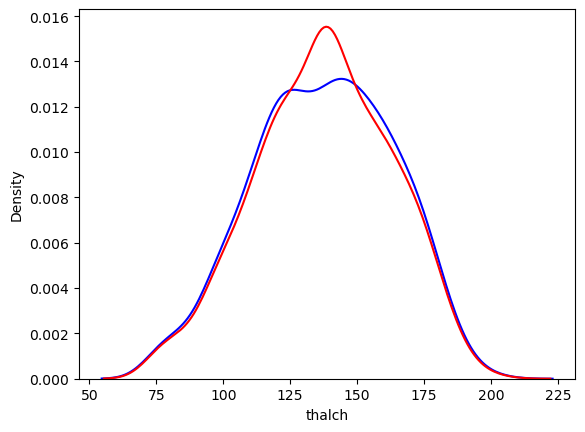

In [20]:
sns.kdeplot(X_train['thalch'],color = "blue")
sns.kdeplot(X_train_encoded['thalch'],color = "red")

<Axes: xlabel='oldpeak', ylabel='Density'>

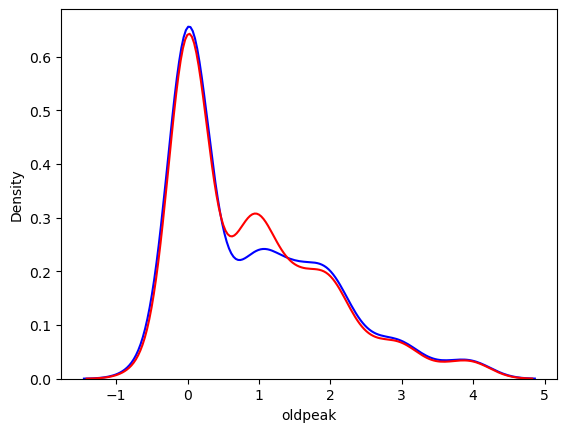

In [21]:
sns.kdeplot(X_train['oldpeak'],color = "blue")
sns.kdeplot(X_train_encoded['oldpeak'],color = "red")

In [22]:
X_train_encoded.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
dtype: int64

In [23]:
X_train_transformed = X_train_encoded 
X_test_transformed  = X_test_encoded 

In [24]:
X_train_transformed

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62.0,1.0,3.0,132.000000,170.0000,0.0,1.0,120.000000,1.0,3.000000,1.0
457,54.0,1.0,2.0,150.000000,224.4875,0.0,0.0,122.000000,0.0,0.000000,1.0
797,51.0,1.0,2.0,131.876812,339.0000,0.0,0.0,137.456023,0.0,0.881783,1.0
25,50.0,0.0,2.0,120.000000,219.0000,0.0,0.0,158.000000,0.0,1.600000,1.0
84,52.0,1.0,1.0,120.000000,325.0000,0.0,0.0,172.000000,0.0,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,59.0,1.0,3.0,140.000000,177.0000,0.0,0.0,162.000000,1.0,0.000000,0.0
270,61.0,1.0,3.0,140.000000,207.0000,0.0,2.0,138.000000,1.0,1.900000,0.0
860,75.0,1.0,3.0,160.000000,310.0000,1.0,0.0,112.000000,1.0,2.000000,2.0
435,53.0,0.0,1.0,140.000000,216.0000,0.0,0.0,142.000000,1.0,2.000000,1.0


# Deafult SVM

[0.67567568 0.65306122 0.68707483 0.70068027 0.68707483]
0.6807133664276522

🎯 Test Accuracy (using tuned threshold): 0.7500

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        75
           1       0.77      0.82      0.79       109

    accuracy                           0.75       184
   macro avg       0.74      0.73      0.74       184
weighted avg       0.75      0.75      0.75       184



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


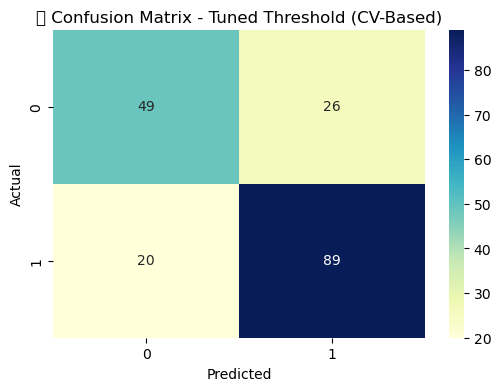

In [25]:
svm_simple = SVC()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(svm_simple, X_train_transformed , y_train , cv = cv , scoring='accuracy')
print(score)
print(np.mean(score))


svm_simple.fit(X_train_transformed, y_train)

y_pred = svm_simple.predict(X_test_transformed )

cm_best = confusion_matrix(y_test, y_pred)
acc_best = accuracy_score(y_test, y_pred)

print(f"\n🎯 Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔍 Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Tuned SVM

In [26]:
categorical_features = ['cp','restecg']
numerical_features = ['age','trestbps','chol','oldpeak','thalch']

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features)
] , remainder = 'passthrough')


# Full pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', SVC(C= 1 ,kernel = 'rbf'))
])


# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(pipeline, X_train_transformed , y_train , cv = cv , scoring='accuracy')
print(score)
print(np.mean(score))


[0.75675676 0.80952381 0.81632653 0.78231293 0.78231293]
0.7894465894465894


In [27]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

def objective(trial):
    # Suggest C
    C = trial.suggest_float('C', 1e-5, 100, log=True)
    kernel = trial.suggest_categorical('kernel',['rbf'])

    # Choose between fixed gamma or float gamma
    gamma_type = trial.suggest_categorical('gamma_type', ['scale', 'auto', 'float'])

    if gamma_type == 'float':
        gamma = trial.suggest_float('gamma', 1e-5, 5.0, log=True)
    else:
        gamma = gamma_type  # 'scale' or 'auto'

    svm_model = SVC(C = C , kernel = kernel , gamma = gamma , random_state = 42 )


    categorical_cols = ['restecg', 'cp']
    numerical_cols = ['age','trestbps','chol','oldpeak','thalch']
    
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')
    
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('clf', svm_model)
    ])


    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=cv, scoring='accuracy')
    return np.mean(scores)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Show results
print(" Best Accuracy:", study.best_value)
print(" Best Hyperparameters:", study.best_params)


[I 2025-09-09 09:31:45,875] A new study created in memory with name: no-name-3d87b95c-260a-49a1-bb95-422bb54ae652
[I 2025-09-09 09:31:46,189] Trial 0 finished with value: 0.7894190108475823 and parameters: {'C': 0.2952196747645625, 'kernel': 'rbf', 'gamma_type': 'scale'}. Best is trial 0 with value: 0.7894190108475823.
[I 2025-09-09 09:31:46,540] Trial 1 finished with value: 0.5434822577679721 and parameters: {'C': 0.00031279143899190845, 'kernel': 'rbf', 'gamma_type': 'auto'}. Best is trial 0 with value: 0.7894190108475823.
[I 2025-09-09 09:31:46,806] Trial 2 finished with value: 0.7948611877183306 and parameters: {'C': 0.269660250804222, 'kernel': 'rbf', 'gamma_type': 'auto'}. Best is trial 2 with value: 0.7948611877183306.
[I 2025-09-09 09:31:47,123] Trial 3 finished with value: 0.5434822577679721 and parameters: {'C': 3.728468570036082e-05, 'kernel': 'rbf', 'gamma_type': 'auto'}. Best is trial 2 with value: 0.7948611877183306.
[I 2025-09-09 09:31:47,416] Trial 4 finished with value

 Best Accuracy: 0.8003033645890788
 Best Hyperparameters: {'C': 0.35097322664743974, 'kernel': 'rbf', 'gamma_type': 'auto'}


In [28]:
#  Best Accuracy: 0.8030336458907887
#  Best Hyperparameters: {'C': 0.3990946408430501, 'kernel': 'rbf', 'gamma_type': 'auto'}


[0.77027027 0.80272109 0.82993197 0.82312925 0.78911565]
0.8030336458907887

 Test Accuracy (using tuned threshold): 0.8478

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        75
           1       0.86      0.88      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


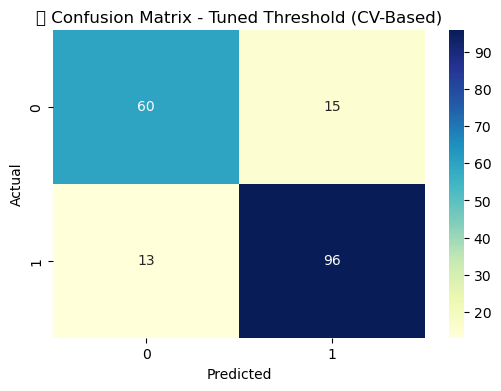

In [29]:
categorical_features = ['cp','restecg']
numerical_features = ['age','trestbps','chol','oldpeak','thalch']

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical

categorical_cols = ['restecg', 'cp']
numerical_cols = ['age','trestbps','chol','oldpeak','thalch']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


# Full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', SVC(kernel = 'rbf' ,C = 0.3990946408430501 ,gamma = 'auto' ,random_state = 42) )
])

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(pipeline, X_train_transformed , y_train , cv = cv , scoring='accuracy')
print(score)
print(np.mean(score))


pipeline.fit(X_train_transformed, y_train)

y_pred = pipeline.predict(X_test_transformed )

cm_best = confusion_matrix(y_test, y_pred)
acc_best = accuracy_score(y_test, y_pred)

print(f"\n Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔍 Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
